In [1]:
import os

import analysis_plotting_helper_functions_v3 as helper
import analysis_utils as utils

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
colors = ["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", 
          "#beb9db", "#fdcce5", "#8bd3c7"]
continuous_colors = ["#54bebe", "#76c8c8", "#98d1d1", "#badbdb", "#dedad2", 
                     "#e4bcad", "#df979e", "#d7658b", "#c80064"]
custom_palette = {'l': colors[1], 's': colors[0]}

remember to make a folder for figures in data_dir!!

In [3]:
cohort = 'cohort_2_v2'
to_analyze = 'full_clean'
data_dir = '/Users/rebekahzhang/Documents/shuler_lab/behavior_data'
figure_folder = os.path.join(data_dir, cohort, 'figures')
data_folder = os.path.join(data_dir, cohort, to_analyze)
print(data_folder)
print(figure_folder)

/Users/rebekahzhang/Documents/shuler_lab/behavior_data/cohort_2_v2/full_clean
/Users/rebekahzhang/Documents/shuler_lab/behavior_data/cohort_2_v2/figures


# Session based plotting

## load session log

In [4]:
training_session_log = utils.load_session_log(data_folder, 'training_sessions.csv')

make mouse list

In [5]:
mouse_list = utils.generate_mouse_list(training_session_log)

['RZ012', 'RZ013', 'RZ015', 'RZ016', 'RZ017']


plot across training days with each mouse as a line

In [68]:
def plot_each_mouse_per_line(mouse_list, data_df, column_name, plot_name, title, x_label, y_label):
    fig = plt.figure()
    for i, mouse in enumerate(mouse_list):
        session_mouse = data_df.loc[data_df.mouse == mouse]
        plt.plot(session_mouse.days, session_mouse[column_name], color=colors[i], label=mouse)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
    fig.savefig(f'{figure_folder}/{plot_name}.png', bbox_inches='tight')

In [69]:
def plot_overdays_colored_by_group(data_df, column_name, plot_name, title, x_label, y_label, 
                                   figure_folder=figure_folder, mouse_list=mouse_list):
    fig = plt.figure()
    sns.lineplot(x="days",
                 y=column_name,
                 data=data_df)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    fig.savefig(f'{figure_folder}/{plot_name}.png', bbox_inches='tight')

In [70]:
def plot_overdays_l_vs_s(data_df, y1, y2, plot_name, title, y_label):
    fig = plt.figure()
    sns.lineplot(x="days", y=y1, data=data_df, color=custom_palette['l'], label='l')
    sns.lineplot(x="days", y=y2, data=data_df, color=custom_palette['s'], label='s')
    plt.title(title)
    plt.xlabel('Days in Training')
    plt.ylabel(y_label)
    plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
    fig.savefig(f'{figure_folder}/{plot_name}.png', bbox_inches='tight')

## Plot type of trials per session

Calculate proportions of trials types and generate trial type df

In [71]:
def generate_trial_type_df(training_session_log):
    for dir_name in training_session_log.dir:
        all_trials = utils.load_all_trials_analyzed(data_folder, dir_name)
        session_performance = helper.get_session_performance(all_trials)
        training_session_log.loc[training_session_log.dir == dir_name, 
                                 ['miss_trials', 'good_trials']] = session_performance
    trial_type_df = training_session_log[['mouse', 'days', 'num_trials', 'miss_trials', 'good_trials']].copy()
    trial_type_df['p_miss'] = trial_type_df.miss_trials/trial_type_df.num_trials
    trial_type_df['p_good'] = trial_type_df.good_trials/trial_type_df.num_trials
    trial_type_df['p_accident'] = 1 - trial_type_df.p_good - trial_type_df.p_miss 
    return trial_type_df

In [72]:
trial_type_df = generate_trial_type_df(training_session_log)

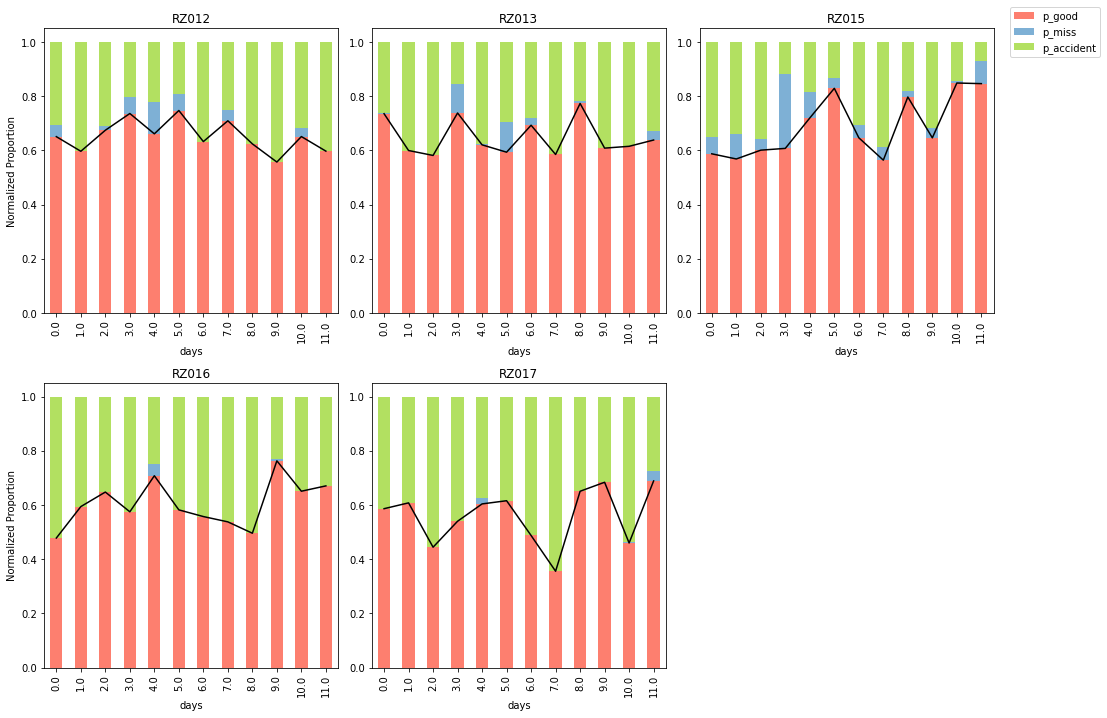

In [75]:
# ploting the proportion of good trials, miss trials, and enl trials per session
fig, axs = plt.subplots(2, 3, figsize=(14, 10))  # 2 rows, 3 columns

# Loop through the mouse list and plot data for each mouse in a subplot
for i, mouse in enumerate(mouse_list):
    session_mouse = trial_type_df.loc[trial_type_df.mouse == mouse]
    to_plot = session_mouse.loc[:, ['days', 'p_good', 'p_miss', 'p_accident']]
    ax = axs.flat[i]
    to_plot.plot.bar(x='days', stacked=True, color=colors[0:3], ax=ax, legend=None)
    ax.set_title(mouse)
    if i == 0 or i == 3:
        ax.set_ylabel('Normalized Proportion')
    ax.plot(to_plot.days, to_plot.p_good, color='k', linewidth=1.5)

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.1, 1))
plt.delaxes(axs.flat[-1])
plt.tight_layout()
plt.savefig(f'{figure_folder}/engagement_plots.png', bbox_inches='tight')
plt.show()

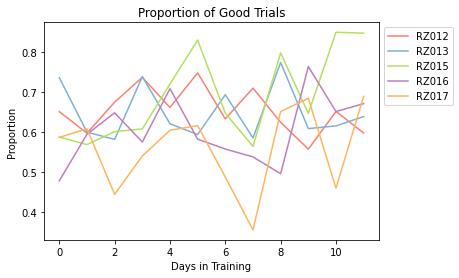

In [12]:
# plot the proportion of good trials
plot_each_mouse_per_line(mouse_list, 
                         data_df=trial_type_df, 
                         column_name='p_good', 
                         plot_name="%_good_trials", 
                         title='Proportion of Good Trials',
                         x_label='Days in Training', 
                         y_label='Proportion')

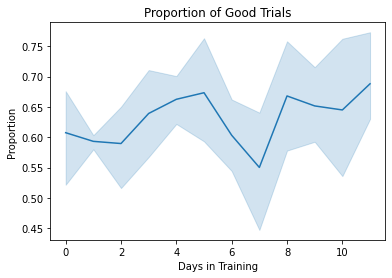

In [13]:
plot_overdays_colored_by_group(data_df=trial_type_df, 
                               column_name="p_good", 
                               plot_name='%_good_trials_by_group', 
                               title='Proportion of Good Trials', 
                               x_label='Days in Training', 
                               y_label='Proportion')

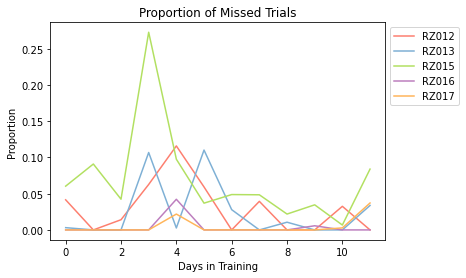

In [14]:
# plot the proportion of miss trials
plot_each_mouse_per_line(mouse_list, 
                         data_df=trial_type_df, 
                         column_name='p_miss', 
                         plot_name="%_miss_trials",
                         title='Proportion of Missed Trials', 
                         x_label='Days in Training', 
                         y_label='Proportion')

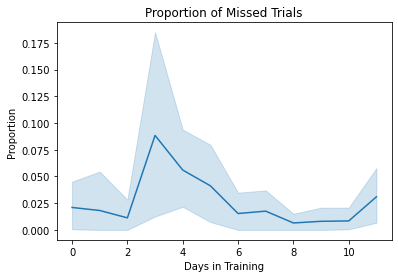

In [15]:
plot_overdays_colored_by_group(data_df=trial_type_df, 
                               column_name="p_miss", 
                               plot_name='%_miss_trials_by_group', 
                               title='Proportion of Missed Trials', 
                               x_label='Days in Training', 
                               y_label='Proportion')

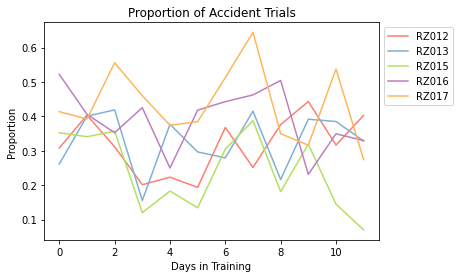

In [16]:
# plot the proportion of accident trials
plot_each_mouse_per_line(mouse_list, 
                         data_df=trial_type_df, 
                         column_name='p_accident', 
                         plot_name="%_accident_trials", 
                         title='Proportion of Accident Trials',
                         x_label='Days in Training', 
                         y_label='Proportion')

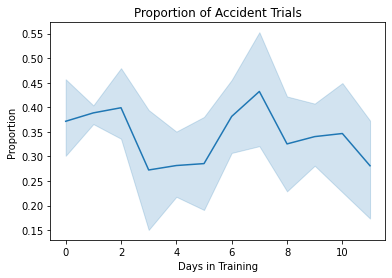

In [83]:
plot_overdays_colored_by_group(data_df=trial_type_df, 
                               column_name="p_accident", 
                               plot_name='%_accident_trials_by_group', 
                               title='Proportion of Accident Trials', 
                               x_label='Days in Training', 
                               y_label='Proportion')

## Plot rewards per session

In [76]:
training_session_log['reward_rate'] = training_session_log.rewards/training_session_log.time

In [77]:
training_session_log['reward_per_trial'] = training_session_log.rewards/training_session_log.num_trials

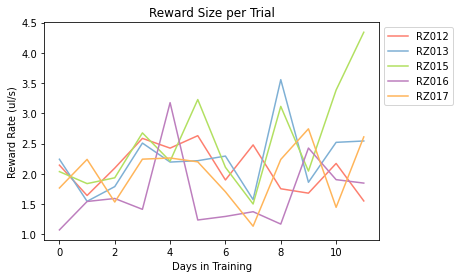

In [79]:
# plot the reward rize
plot_each_mouse_per_line(mouse_list, 
                         data_df=training_session_log, 
                         column_name='reward_per_trial', 
                         plot_name="reward_size",
                         title='Reward Size per Trial', 
                         x_label='Days in Training', 
                         y_label='Reward Rate (ul/s)')

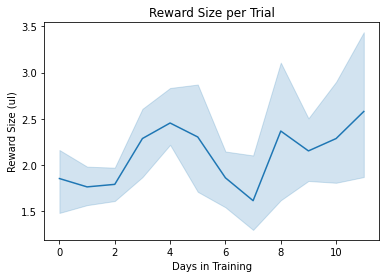

In [80]:
plot_overdays_colored_by_group(data_df=training_session_log, 
                               column_name="reward_per_trial", 
                               plot_name='reward_size_by_group', 
                               title='Reward Size per Trial', 
                               x_label='Days in Training', 
                               y_label='Reward Size (ul)')

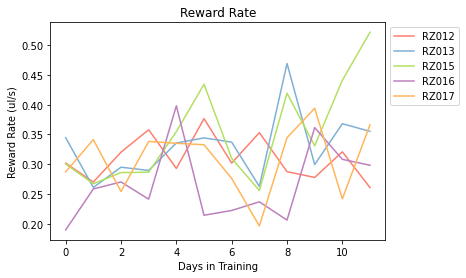

In [81]:
# plot the reward rate
plot_each_mouse_per_line(mouse_list, 
                         data_df=training_session_log, 
                         column_name='reward_rate', 
                         plot_name="reward_rate",
                         title='Reward Rate', 
                         x_label='Days in Training', 
                         y_label='Reward Rate (ul/s)')

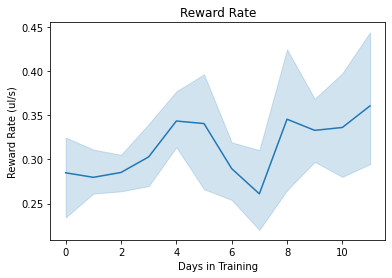

In [82]:
plot_overdays_colored_by_group(data_df=training_session_log, 
                               column_name="reward_rate", 
                               plot_name='reward_rate_by_group', 
                               title='Reward Rate', 
                               x_label='Days in Training', 
                               y_label='Reward Rate (ul/s)')

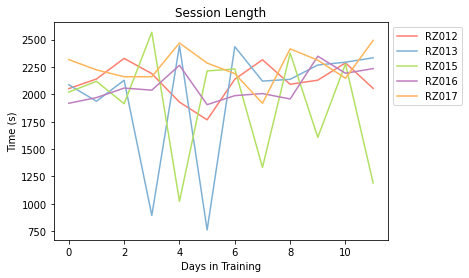

In [24]:
# plot the session length
plot_each_mouse_per_line(mouse_list, 
                         data_df=training_session_log, 
                         column_name='time', 
                         plot_name="session_length", 
                         title='Session Length',
                         x_label='Days in Training', 
                         y_label='Time (s)')

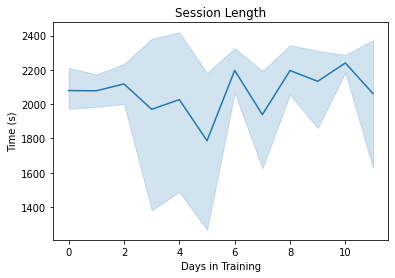

In [25]:
plot_overdays_colored_by_group(data_df=training_session_log, 
                               column_name="time", 
                               plot_name='session_length_by_group', 
                               title='Session Length', 
                               x_label='Days in Training', 
                               y_label='Time (s)')

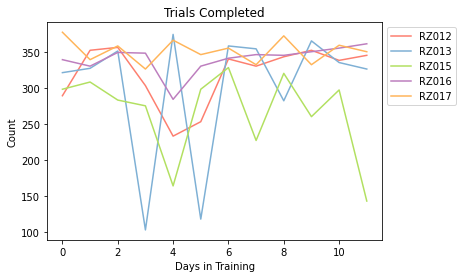

In [26]:
# plot the number of trials completed
plot_each_mouse_per_line(mouse_list, 
                         data_df=training_session_log, 
                         column_name='num_trials', 
                         plot_name="num_trials", 
                         title='Trials Completed',
                         x_label='Days in Training', 
                         y_label='Count')

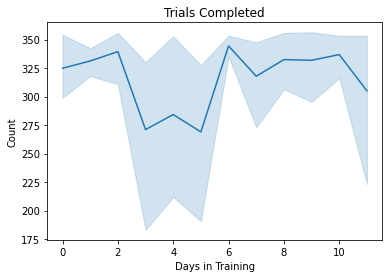

In [84]:
plot_overdays_colored_by_group(data_df=training_session_log, 
                               column_name="num_trials", 
                               plot_name='num_trials_by_group', 
                               title='Trials Completed', 
                               x_label='Days in Training', 
                               y_label='Count')

## Plot time wait behavior

In [6]:
def generate_wait_df(training_session_log):
    wait_df = training_session_log[['mouse', 'days', 'dir']].copy()

    for dir_name in training_session_log.dir:
        all_trials = utils.load_all_trials_analyzed(data_folder, dir_name)
        # time waited for all trials
        session_tw = helper.get_session_tw(all_trials)
        wait_df.loc[wait_df.dir == dir_name, 
                                ['tw_mean', 'tw_median', 'tw_stdev']] = session_tw
        # time waited for long and short blocks
        block_tw = helper.get_block_tw(all_trials)
        wait_df.loc[wait_df.dir == dir_name, 
                                ['tw_l_mean', 'tw_l_median', 'tw_l_stdev',
                                'tw_s_mean', 'tw_s_median','tw_s_stdev']] = block_tw

        good_trials = utils.select_good_trials(all_trials)
         # time waited for good trials
        session_tw_g = helper.get_session_tw(good_trials)
        wait_df.loc[wait_df.dir == dir_name, 
                                ['tw_mean_g', 'tw_median_g', 'tw_stdev_g']] = session_tw_g
        block_tw_g = helper.get_block_tw(good_trials)
        wait_df.loc[wait_df.dir == dir_name, 
                                ['tw_l_mean_g', 'tw_l_median_g', 'tw_l_stdev_g',
                                'tw_s_mean_g', 'tw_s_median_g','tw_s_stdev_g']] = block_tw_g

    wait_df['tw_diff'] = wait_df['tw_l_mean'] - wait_df['tw_s_mean']
    wait_df['tw_diff_g'] = wait_df['tw_l_mean_g'] - wait_df['tw_s_mean_g']
    return wait_df

In [7]:
wait_df = generate_wait_df(training_session_log)

In [9]:
def save_log(log_df, data_folder, filename):
    path = os.path.join(data_folder, filename)
    log_df.to_csv(path, index=False)

In [10]:
save_log(wait_df, data_folder, 'wait.csv')

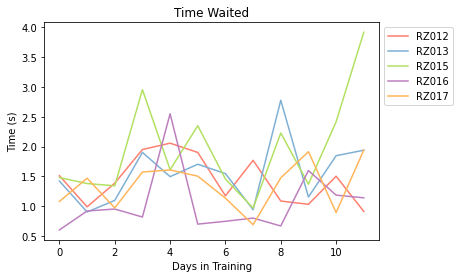

In [30]:
# plot the time waited over days. 
plot_each_mouse_per_line(mouse_list, 
                         data_df=wait_df, 
                         column_name='tw_mean', 
                         plot_name="tw_mean", 
                         title='Time Waited',
                         x_label='Days in Training', 
                         y_label='Time (s)')

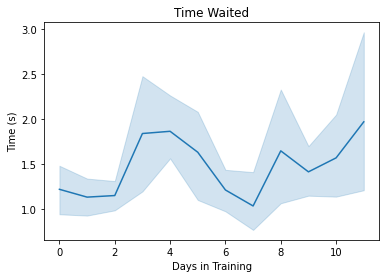

In [31]:
plot_overdays_colored_by_group(data_df=wait_df, 
                               column_name="tw_mean", 
                               plot_name='tw_mean_by_group', 
                               title='Time Waited', 
                               x_label='Days in Training', 
                               y_label='Time (s)')

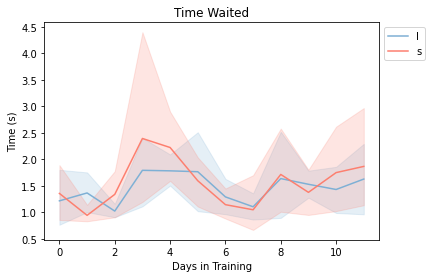

In [32]:
plot_overdays_l_vs_s(data_df = wait_df, 
                     y1='tw_l_mean', 
                     y2='tw_s_mean', 
                     plot_name='tw_s_l', 
                     title='Time Waited', 
                     y_label='Time (s)')

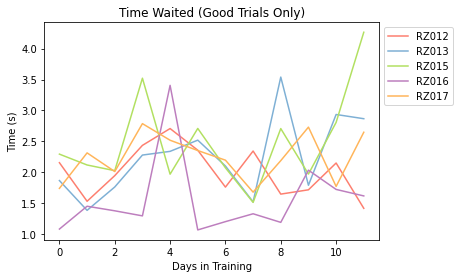

In [33]:
# plot the time waited over days good trials only. 
plot_each_mouse_per_line(mouse_list, 
                         data_df=wait_df, 
                         column_name='tw_mean_g', 
                         plot_name="tw_mean_g", 
                         title='Time Waited (Good Trials Only)',
                         x_label='Days in Training', 
                         y_label='Time (s)')

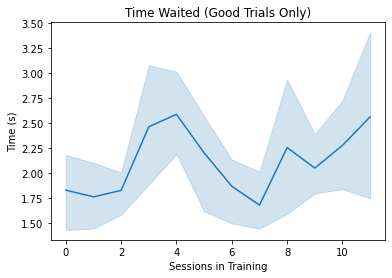

In [34]:
plot_overdays_colored_by_group(data_df=wait_df, 
                               column_name="tw_mean_g", 
                               plot_name='tw_mean_g_by_group', 
                               title='Time Waited (Good Trials Only)', 
                               x_label='Sessions in Training', 
                               y_label='Time (s)')

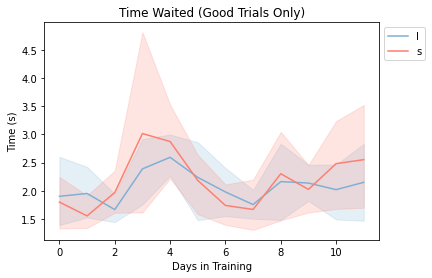

In [35]:
plot_overdays_l_vs_s(data_df = wait_df, 
                     y1='tw_l_mean_g', 
                     y2='tw_s_mean_g', 
                     plot_name='tw_s_l_g', 
                     title='Time Waited (Good Trials Only)', 
                     y_label='Time (s)')

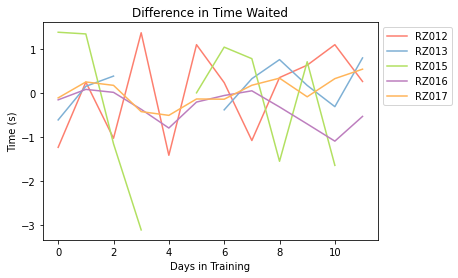

In [36]:
# plot the difference in time waited bewteen long and short blocks over days. 
plot_each_mouse_per_line(mouse_list, 
                         data_df=wait_df, 
                         column_name='tw_diff', 
                         plot_name="tw_diff", 
                         title='Difference in Time Waited',
                         x_label='Days in Training', 
                         y_label='Time (s)')

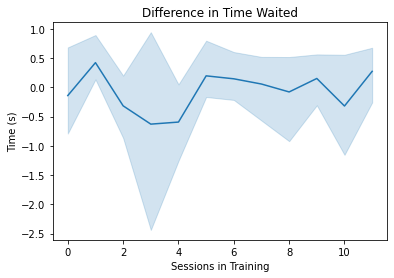

In [37]:
plot_overdays_colored_by_group(data_df=wait_df, 
                               column_name="tw_diff", 
                               plot_name='tw_diff_by_group', 
                               title='Difference in Time Waited', 
                               x_label='Sessions in Training', 
                               y_label='Time (s)')

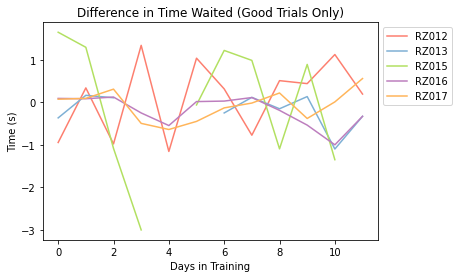

In [38]:
# plot the difference in time waited bewteen long and short blocks over days. good trials only
plot_each_mouse_per_line(mouse_list, 
                         data_df=wait_df, 
                         column_name='tw_diff_g', 
                         plot_name="tw_diff_g", 
                         title='Difference in Time Waited (Good Trials Only)',
                         x_label='Days in Training', 
                         y_label='Time (s)')

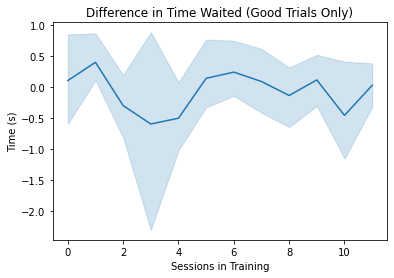

In [39]:
plot_overdays_colored_by_group(data_df=wait_df, 
                               column_name="tw_diff_g", 
                               plot_name='tw_diff_g_by_group', 
                               title='Difference in Time Waited (Good Trials Only)', 
                               x_label='Sessions in Training', 
                               y_label='Time (s)')

In [40]:
def generate_linear_fit_df(training_session_log):
    linear_fit_df = training_session_log[['mouse', 'days', 'dir']].copy()
    for dir_name in training_session_log.dir:
        all_trials = utils.load_all_trials_analyzed(data_folder, dir_name)
        all_trials = all_trials[all_trials['time_waited'].notna()]
        fit_data = utils.linear_fit(all_trials, 'bg_length', 'time_waited')
        linear_fit_df.loc[linear_fit_df.dir == dir_name, 
                                ['slope', 'intercept', 'rsquared']] = fit_data
    return linear_fit_df

In [41]:
linear_fit_df = generate_linear_fit_df(training_session_log)

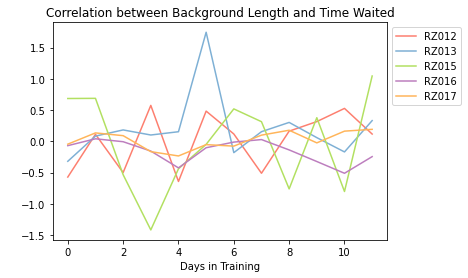

In [42]:
# plot the difference in time waited bewteen long and short blocks over days. good trials only
plot_each_mouse_per_line(mouse_list, 
                         data_df=linear_fit_df, 
                         column_name='slope', 
                         plot_name="tb_tw_correlation", 
                         title='Correlation between Background Length and Time Waited',
                         x_label='Days in Training', 
                         y_label=' ')

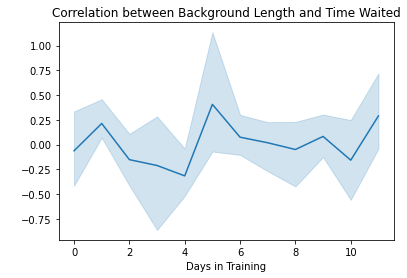

In [43]:
plot_overdays_colored_by_group(data_df=linear_fit_df, 
                               column_name="slope", 
                               plot_name='tb_tw_correlation_by_group', 
                               title='Correlation between Background Length and Time Waited', 
                               x_label='Days in Training', 
                               y_label=' ')

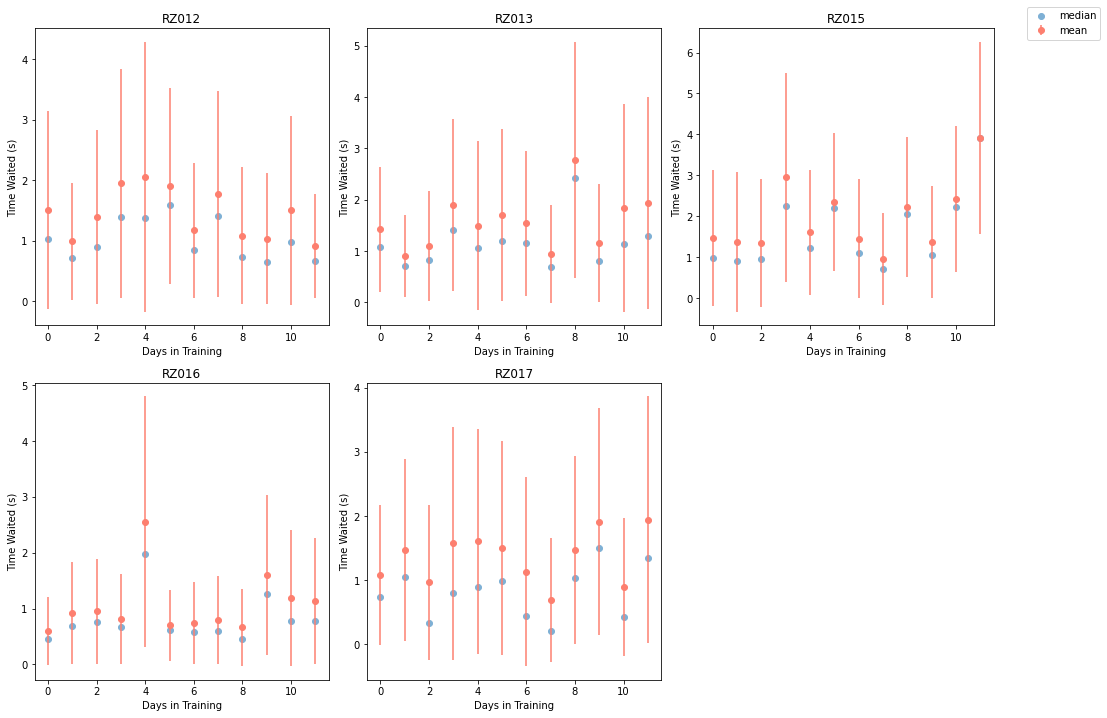

In [44]:
# Create a figure with six subplots
fig, axs = plt.subplots(2, 3, figsize=(14, 10))  # 2 rows, 3 columns

# Loop through the mouse list and plot data for each mouse in a subplot
for i, mouse in enumerate(mouse_list):
    session_mouse = wait_df.loc[wait_df.mouse == mouse]
    ax = axs.flat[i]
    ax.errorbar(session_mouse.days, session_mouse.tw_mean, session_mouse.tw_stdev, 
                linestyle='None', marker='o', color=colors[0], label='mean')
    ax.scatter(session_mouse.days, session_mouse.tw_median, color=colors[1], 
               label='median')
    ax.set_title(mouse)
    ax.set_xlabel('Days in Training')
    ax.set_ylabel('Time Waited (s)')

# Extract the legend from the first subplot
handles, labels = axs[0, 0].get_legend_handles_labels()

# Set the figure legend outside the loop
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.1, 1))

plt.delaxes(axs.flat[-1])

# Adjust the spacing between subplots
plt.tight_layout()

# Save the figure with proper spacing around the subplots
plt.savefig(f'{figure_folder}/tw_plots.png', bbox_inches='tight', dpi=300)

# Show the plot (optional)
plt.show()

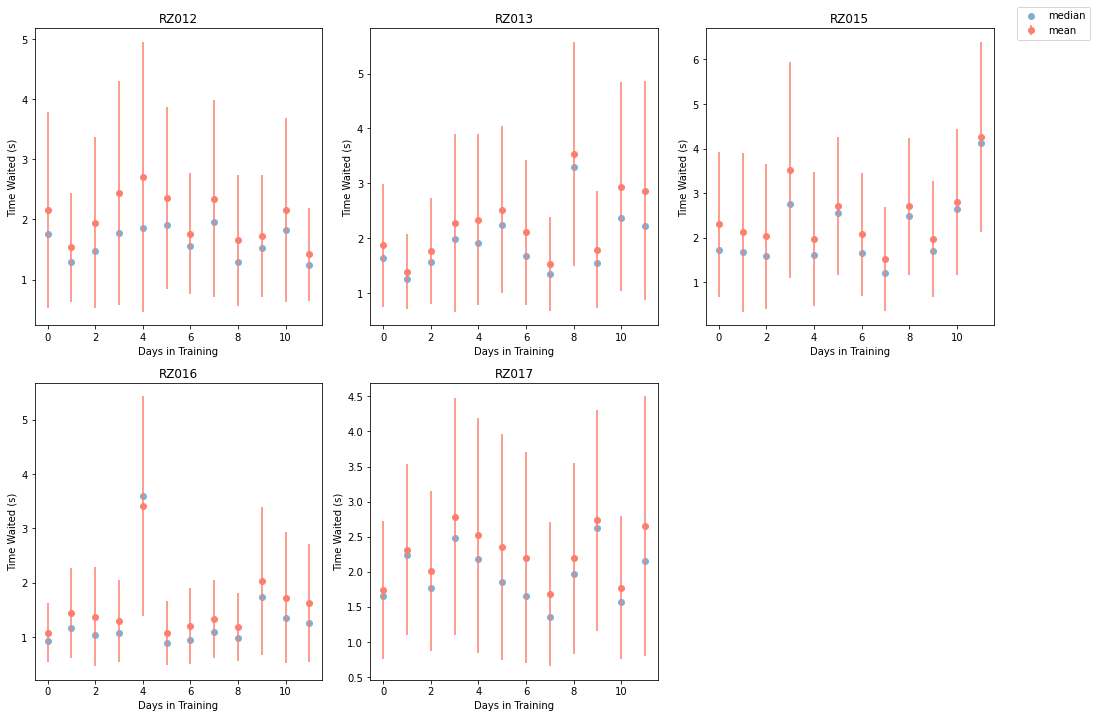

In [45]:
# Create a figure with six subplots
fig, axs = plt.subplots(2, 3, figsize=(14, 10))  # 2 rows, 3 columns

# Loop through the mouse list and plot data for each mouse in a subplot
for i, mouse in enumerate(mouse_list):
    session_mouse = wait_df.loc[wait_df.mouse == mouse]
    ax = axs.flat[i]
    ax.errorbar(session_mouse.days, session_mouse.tw_mean_g, session_mouse.tw_stdev_g, 
                linestyle='None', marker='o', color=colors[0], label='mean')
    ax.scatter(session_mouse.days, session_mouse.tw_median_g, color=colors[1], 
               label='median')
    ax.set_title(mouse)
    ax.set_xlabel('Days in Training')
    ax.set_ylabel('Time Waited (s)')

# Extract the legend from the first subplot
handles, labels = axs[0, 0].get_legend_handles_labels()

# Set the figure legend outside the loop
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.09, 1))

plt.delaxes(axs.flat[-1])

# Adjust the spacing between subplots
plt.tight_layout()

# Save the figure with proper spacing around the subplots
plt.savefig(f'{figure_folder}/tw_good_plots.png', bbox_inches='tight', dpi=300)

# Show the plot (optional)
plt.show()

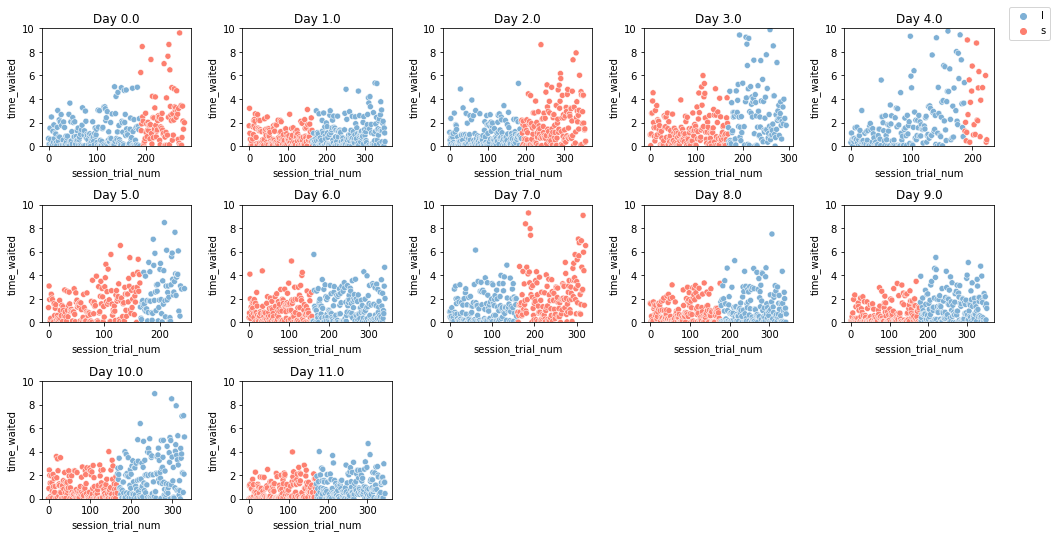

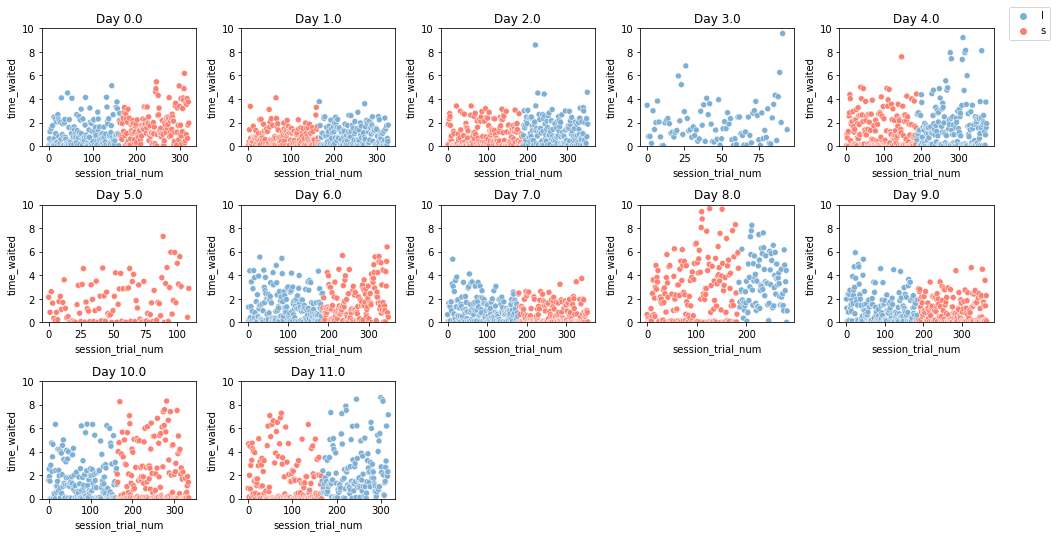

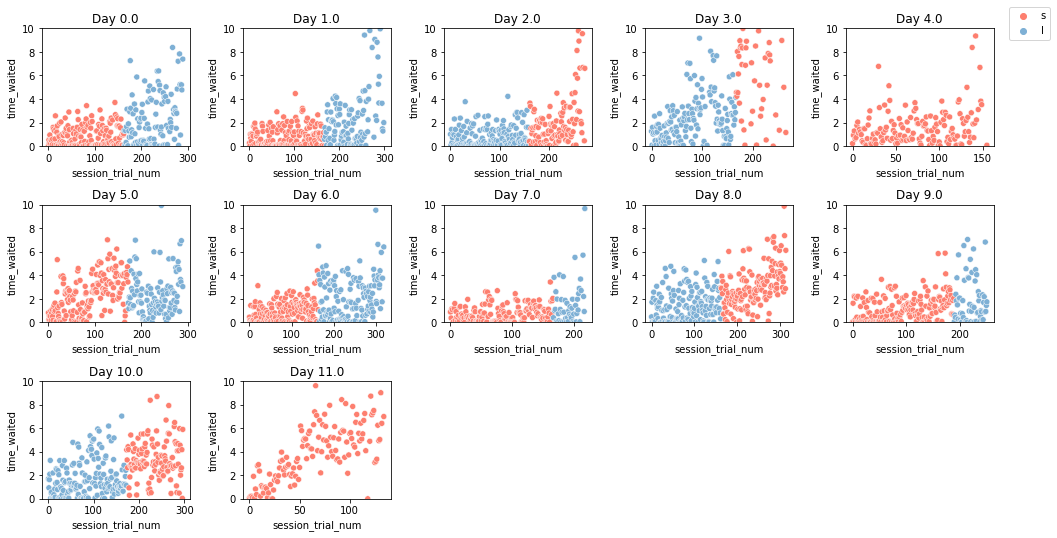

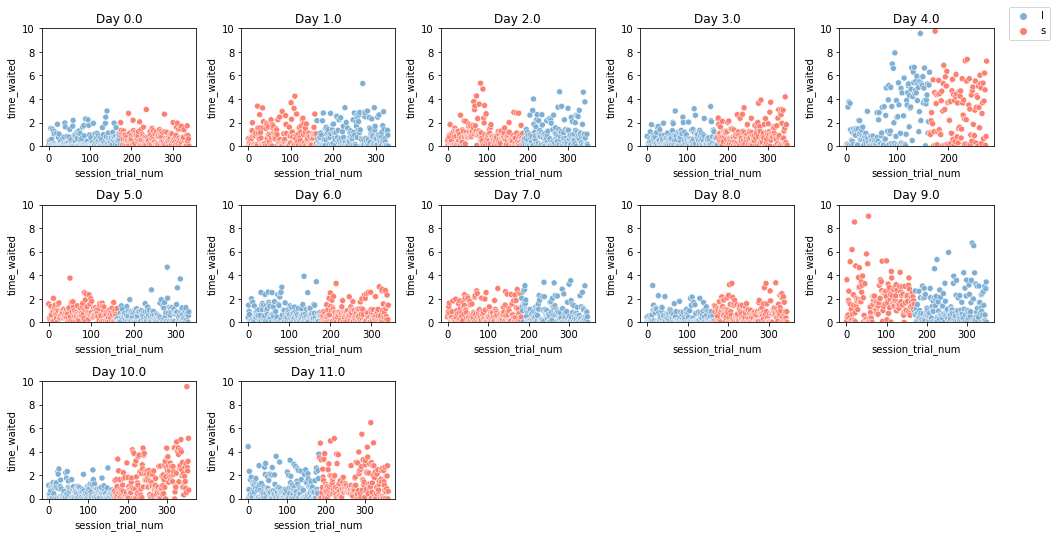

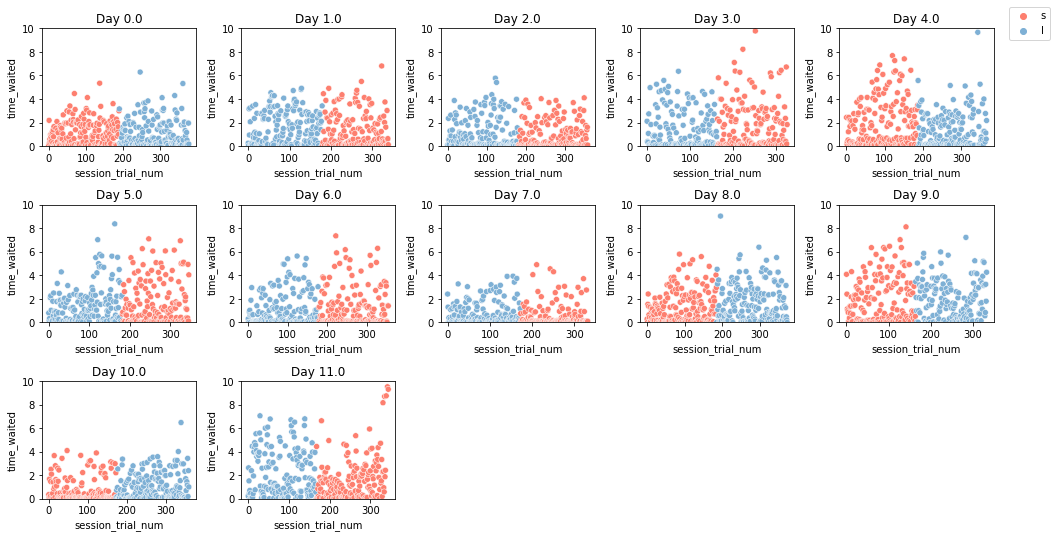

In [46]:
for mouse in mouse_list:
    session_mouse = training_session_log.loc[training_session_log.mouse == mouse]
    days_trained = len(session_mouse)

    # Calculate the number of rows and columns for the subplot grid
    num_rows = (days_trained - 1) // 5 + 1
    num_cols = min(days_trained, 5)

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(14, 2.5 * num_rows))

    for i, (dir_name, day) in enumerate(zip(session_mouse.dir, session_mouse.days)):
        all_trials = utils.load_all_trials_analyzed(data_folder, dir_name)
        row_idx = i // num_cols
        col_idx = i % num_cols
        ax = axs[row_idx, col_idx]
        
        sns.scatterplot(x="session_trial_num",
                        y="time_waited",
                        hue="blk_type",
                        data=all_trials,
                        palette=custom_palette,
                        ax=axs.flat[i])
        ax.set_title(f'Day {day}')
        ax.set_ylim([0, 10])

    handles, labels = axs[0, 0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.05, 1))
    
    # Remove any unused subplots
    if i + 1 < num_rows * num_cols:
        for j in range(i + 1, num_rows * num_cols):
            axs.flat[j].axis('off')
    
    for i in range(days_trained):
        ax = axs.flat[i]
        ax.get_legend().remove()

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Save the figure with proper spacing around the subplots
    plt.savefig(f'{figure_folder}/trial_num_vs_tw_{mouse}.png', bbox_inches='tight', dpi=300)

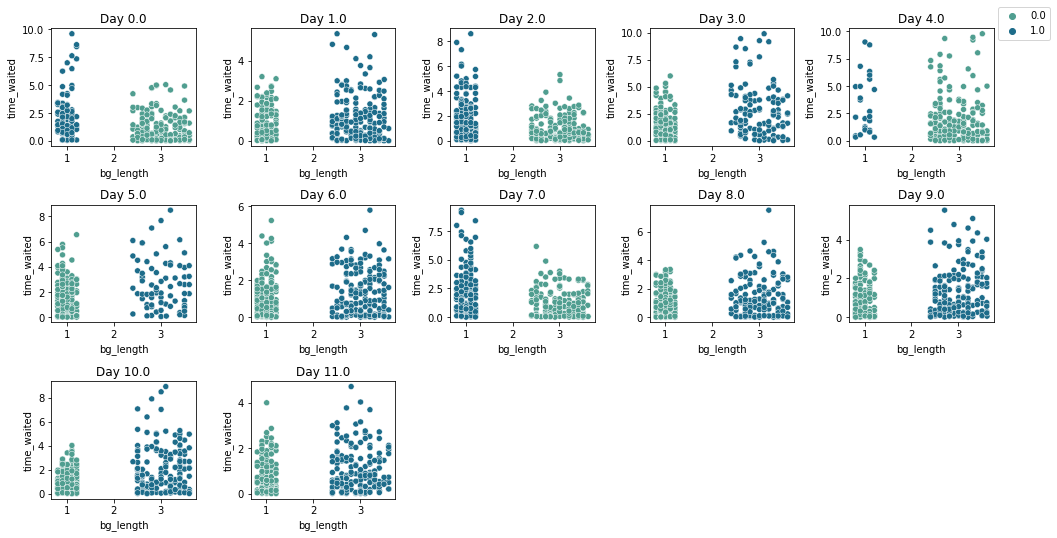

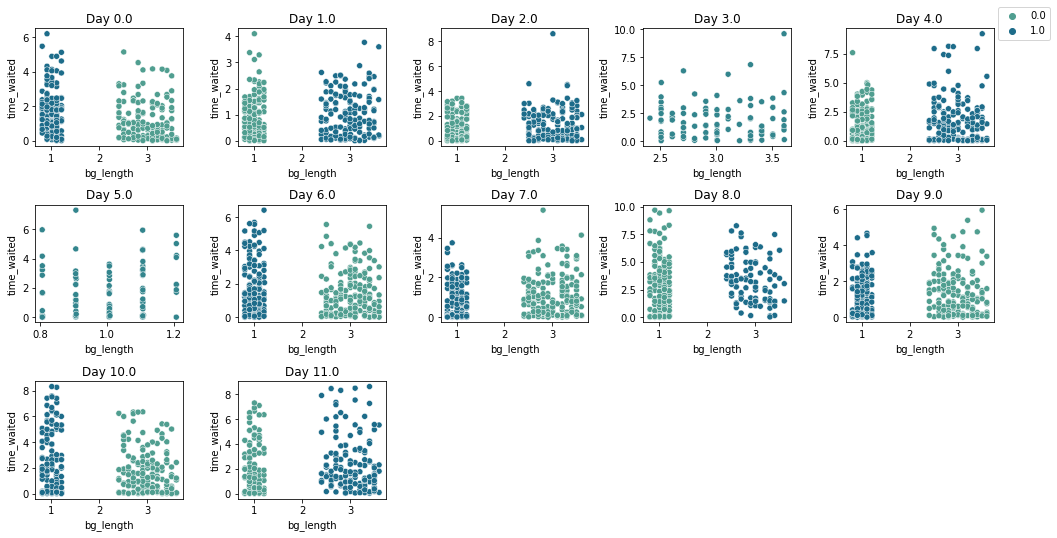

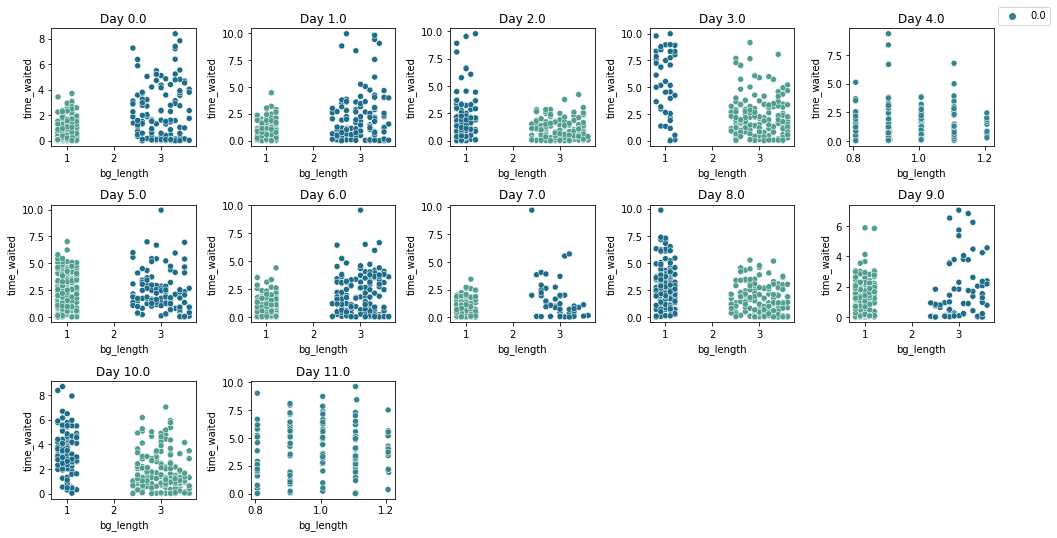

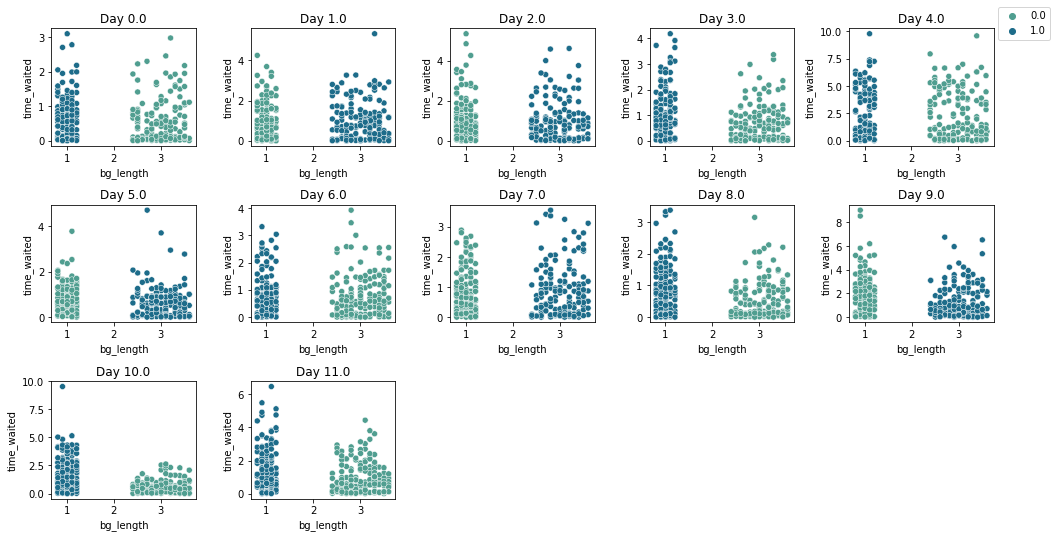

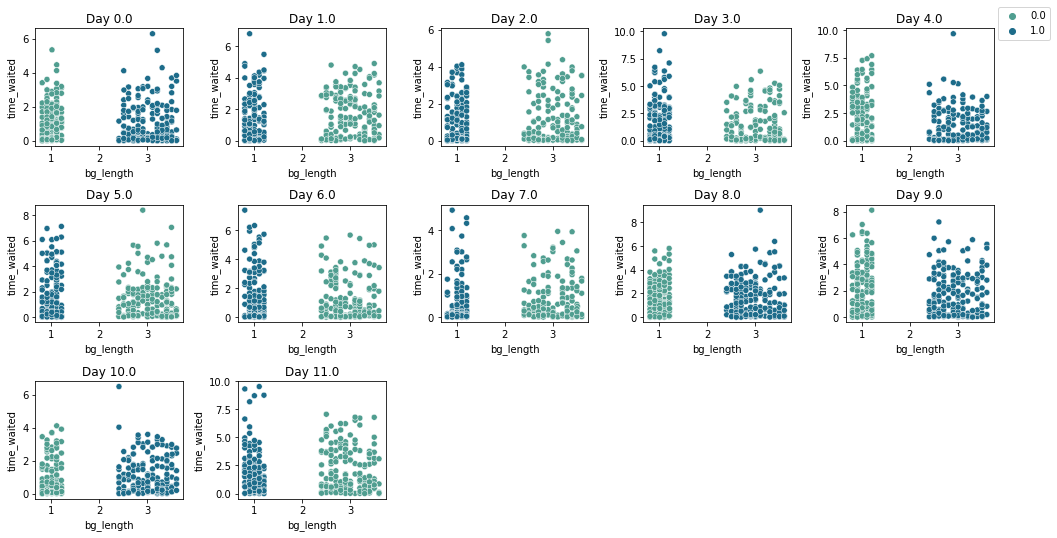

In [47]:
for mouse in mouse_list:
    session_mouse = training_session_log.loc[training_session_log.mouse == mouse]
    days_trained = len(session_mouse)

    # Calculate the number of rows and columns for the subplot grid
    num_rows = (days_trained - 1) // 5 + 1
    num_cols = min(days_trained, 5)

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(14, 2.5 * num_rows))

    for i, (dir_name, day) in enumerate(zip(session_mouse.dir, session_mouse.days)):
        all_trials = utils.load_all_trials_analyzed(data_folder, dir_name)
        row_idx = i // num_cols
        col_idx = i % num_cols
        ax = axs[row_idx, col_idx]
      
        sns.scatterplot(x="bg_length",
                        y="time_waited",
                        hue="block_num",
                        data=all_trials,
                        palette="crest",
                        ax=axs.flat[i])
        ax.set_title(f'Day {day}')
        handles, labels = ax.get_legend_handles_labels()
    
    fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.05, 1))
    
    # Remove any unused subplots
    if i + 1 < num_rows * num_cols:
        for j in range(i + 1, num_rows * num_cols):
            axs.flat[j].axis('off')
    
    for i in range(days_trained):
        ax = axs.flat[i]
        ax.get_legend().remove()

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Save the figure with proper spacing around the subplots
    plt.savefig(f'{figure_folder}/bg_vs_tw_blk_{mouse}.png', bbox_inches='tight', dpi=300)



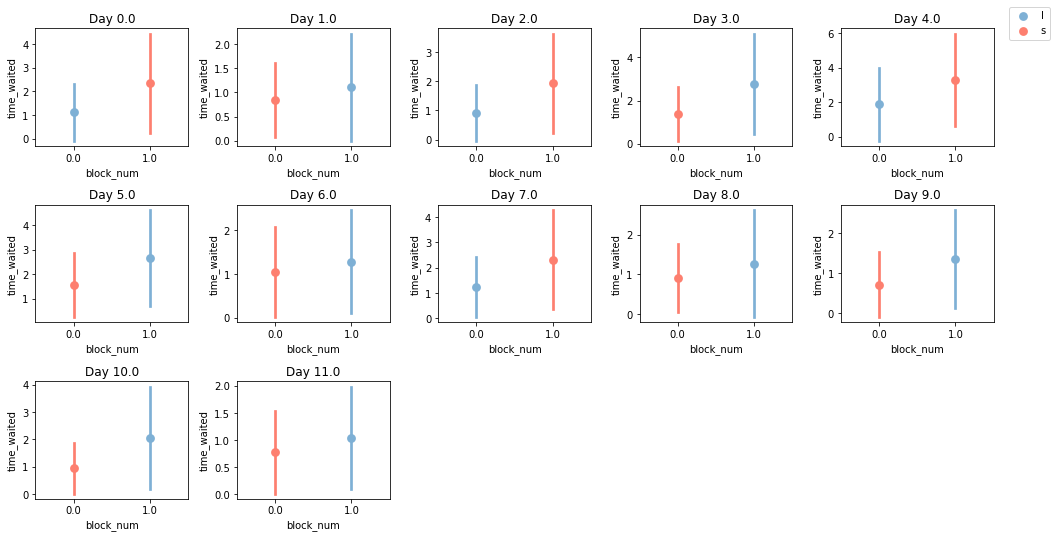

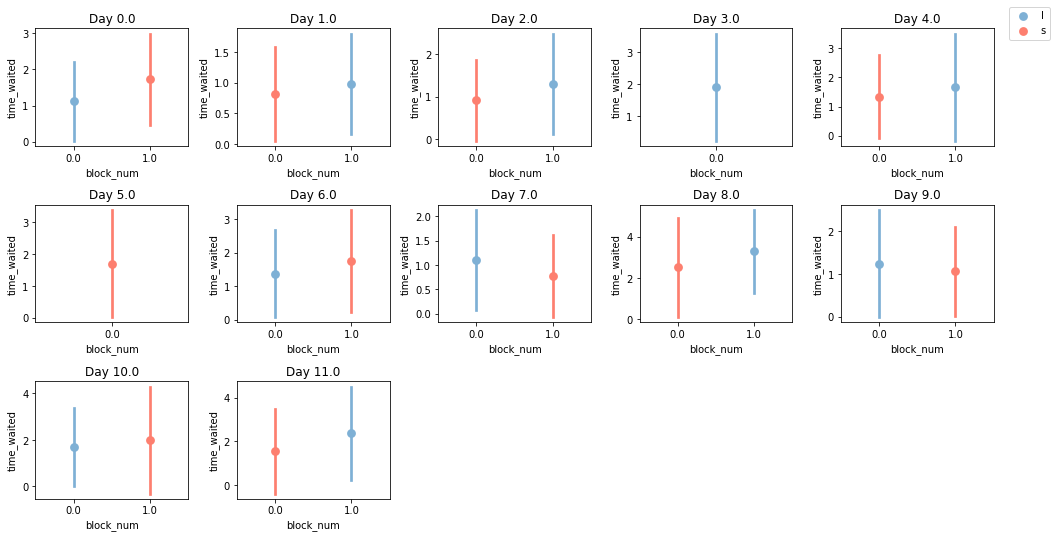

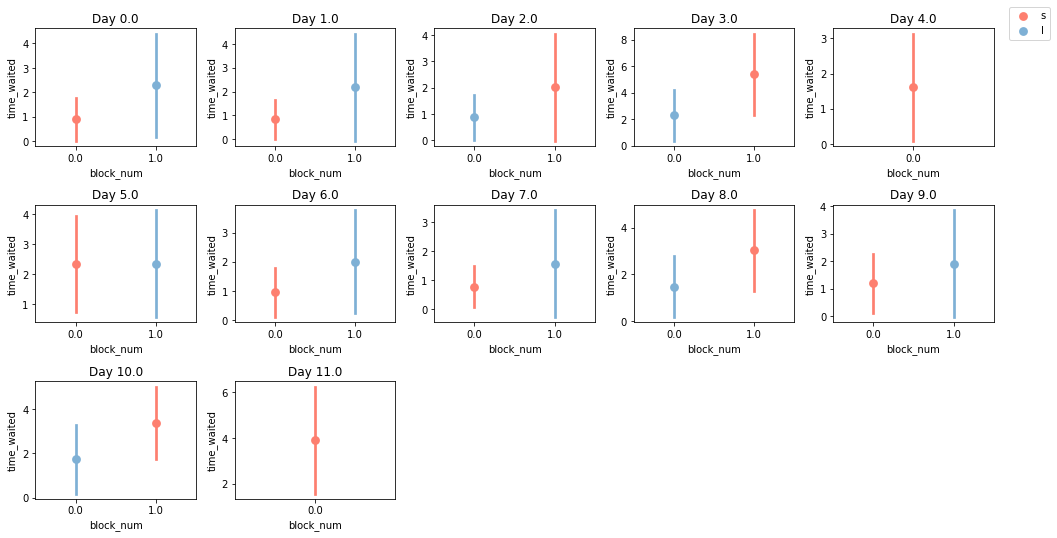

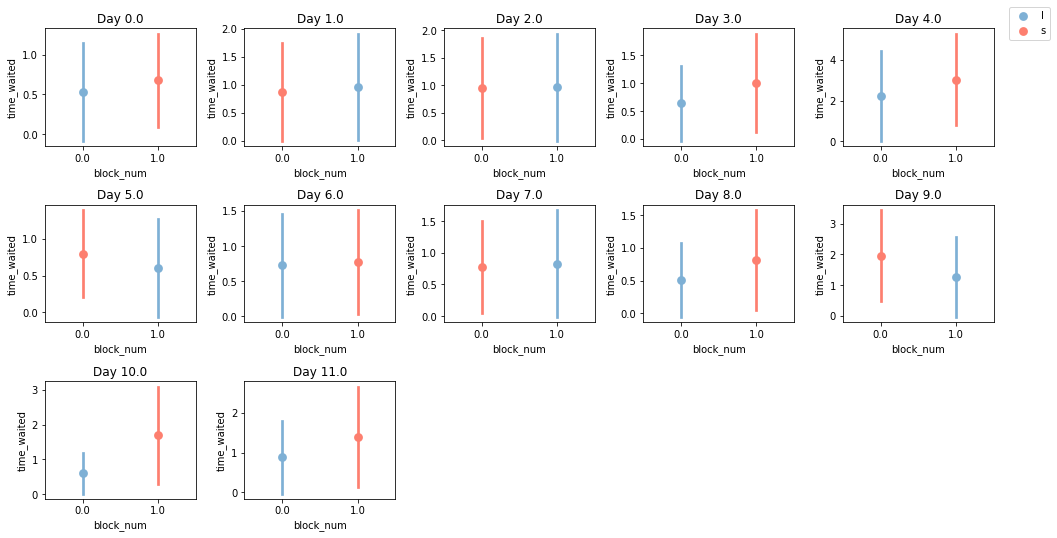

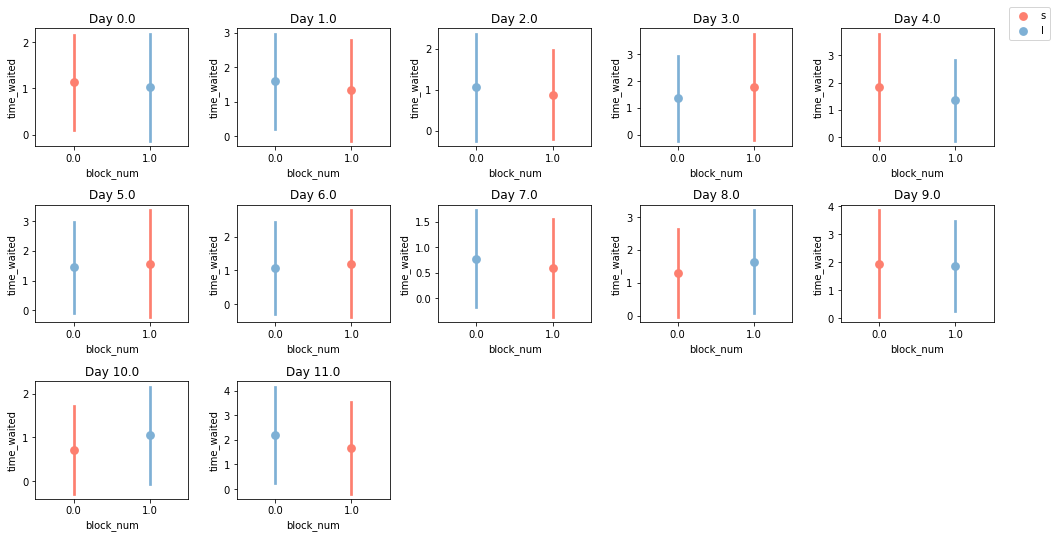

In [48]:
for mouse in mouse_list:
    session_mouse = training_session_log.loc[training_session_log.mouse == mouse]
    days_trained = len(session_mouse)

    # Calculate the number of rows and columns for the subplot grid
    num_rows = (days_trained - 1) // 5 + 1
    num_cols = min(days_trained, 5)

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(14, 2.5 * num_rows))

    for i, (dir_name, day) in enumerate(zip(session_mouse.dir, session_mouse.days)):
        all_trials = utils.load_all_trials_analyzed(data_folder, dir_name)
        row_idx = i // num_cols
        col_idx = i % num_cols
        ax = axs[row_idx, col_idx]

        sns.pointplot(x="block_num",
                        y="time_waited",
                        errorbar='sd',
                        hue="blk_type",
                        data=all_trials,
                        palette=custom_palette,
                        ax=axs.flat[i])
        ax.set_title(f'Day {day}')

    handles, labels = axs[0, 0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.05, 1))
    
    # Remove any unused subplots
    if i + 1 < num_rows * num_cols:
        for j in range(i + 1, num_rows * num_cols):
            axs.flat[j].axis('off')
    
    for i in range(days_trained):
        ax = axs.flat[i]
        ax.get_legend().remove()

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Save the figure with proper spacing around the subplots
    plt.savefig(f'{figure_folder}/trial_num_vs_tw_pointplot_{mouse}.png', bbox_inches='tight', dpi=300)

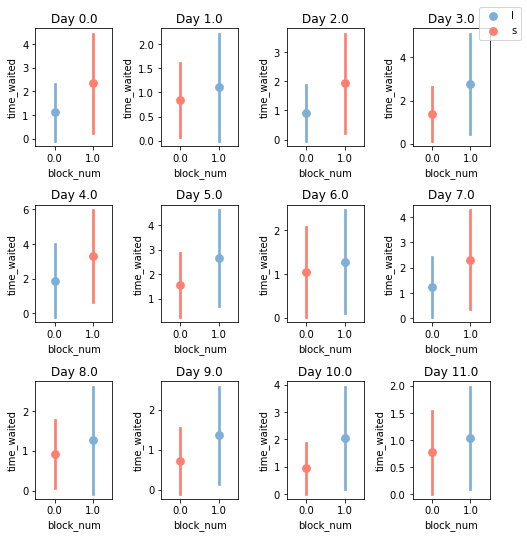

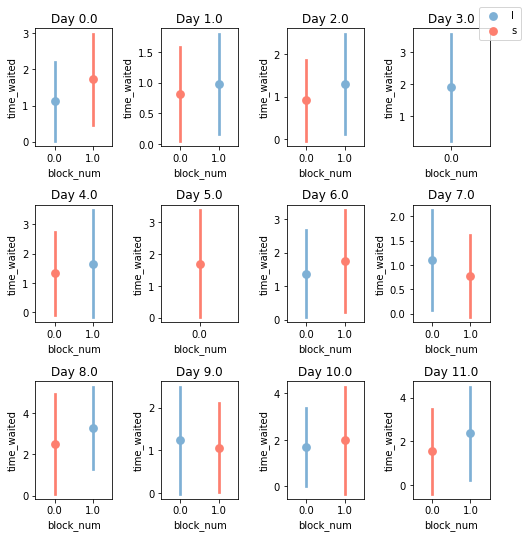

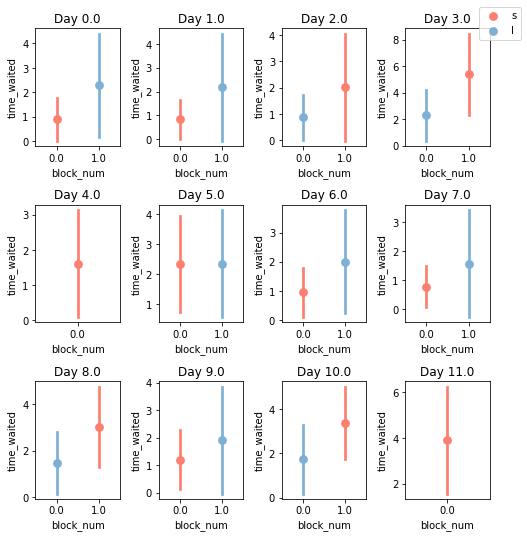

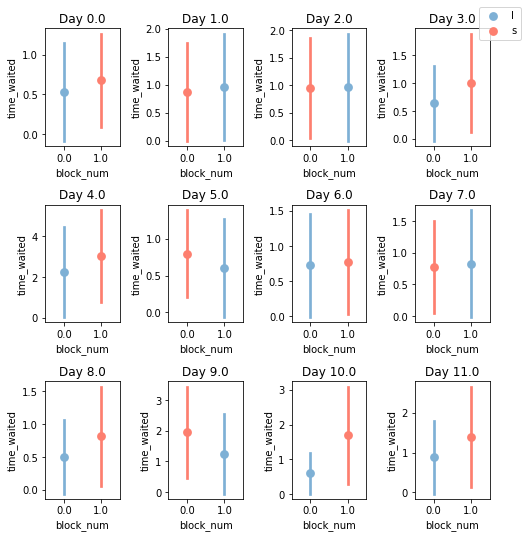

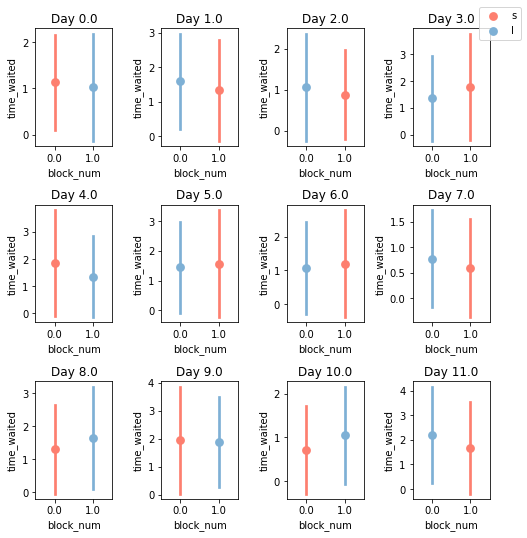

In [10]:
# same as above but smaller
for mouse in mouse_list:
    session_mouse = training_session_log.loc[training_session_log.mouse == mouse]
    days_trained = len(session_mouse)

    # Calculate the number of rows and columns for the subplot grid
    num_rows = (days_trained - 1) // 4 + 1
    num_cols = min(days_trained, 4)

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(7, 2.5 * num_rows))

    for i, (dir_name, day) in enumerate(zip(session_mouse.dir, session_mouse.days)):
        all_trials = utils.load_all_trials_analyzed(data_folder, dir_name)
        row_idx = i // num_cols
        col_idx = i % num_cols
        ax = axs[row_idx, col_idx]

        sns.pointplot(x="block_num",
                        y="time_waited",
                        errorbar='sd',
                        hue="blk_type",
                        data=all_trials,
                        palette=custom_palette,
                        ax=axs.flat[i])
        ax.set_title(f'Day {day}')

    handles, labels = axs[0, 0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.05, 1))
    
    # Remove any unused subplots
    if i + 1 < num_rows * num_cols:
        for j in range(i + 1, num_rows * num_cols):
            axs.flat[j].axis('off')
    
    for i in range(days_trained):
        ax = axs.flat[i]
        ax.get_legend().remove()

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Save the figure with proper spacing around the subplots
    plt.savefig(f'{figure_folder}/trial_num_vs_tw_pointplot_{mouse}.png', bbox_inches='tight', dpi=300)

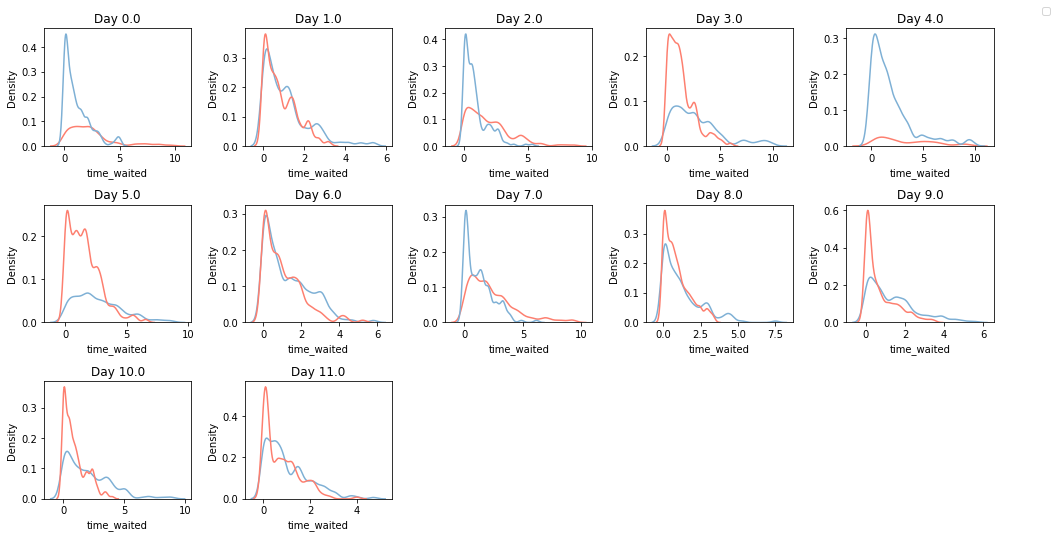

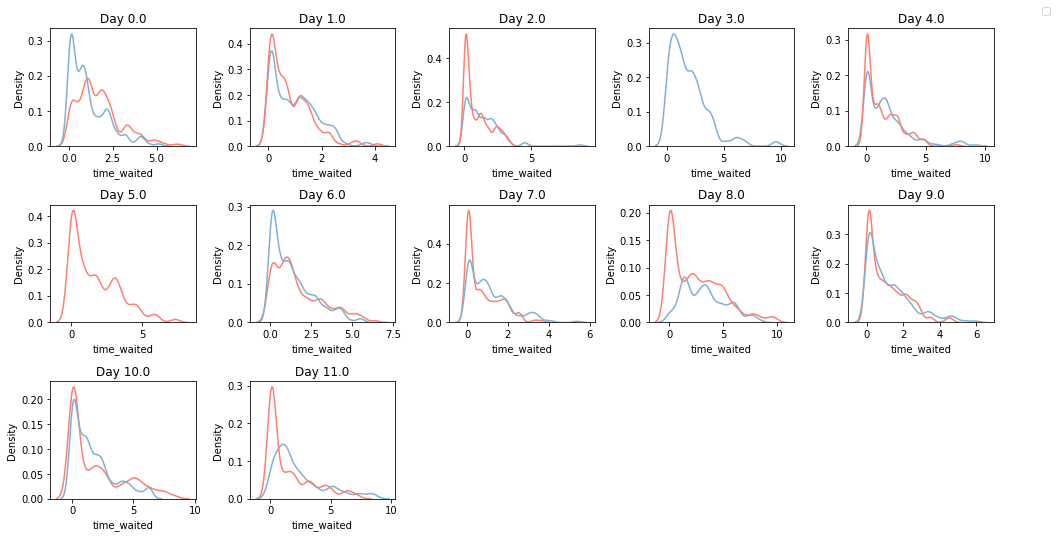

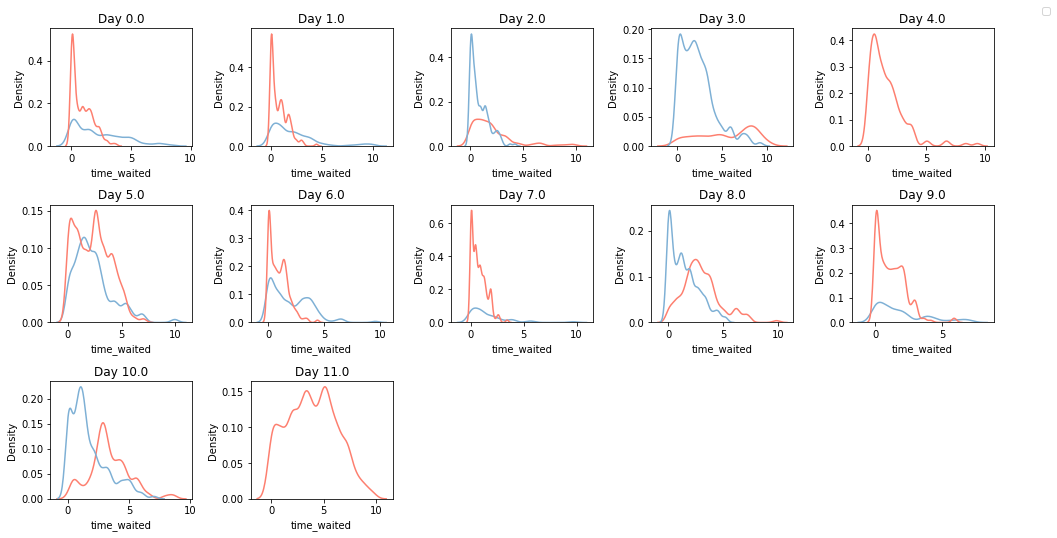

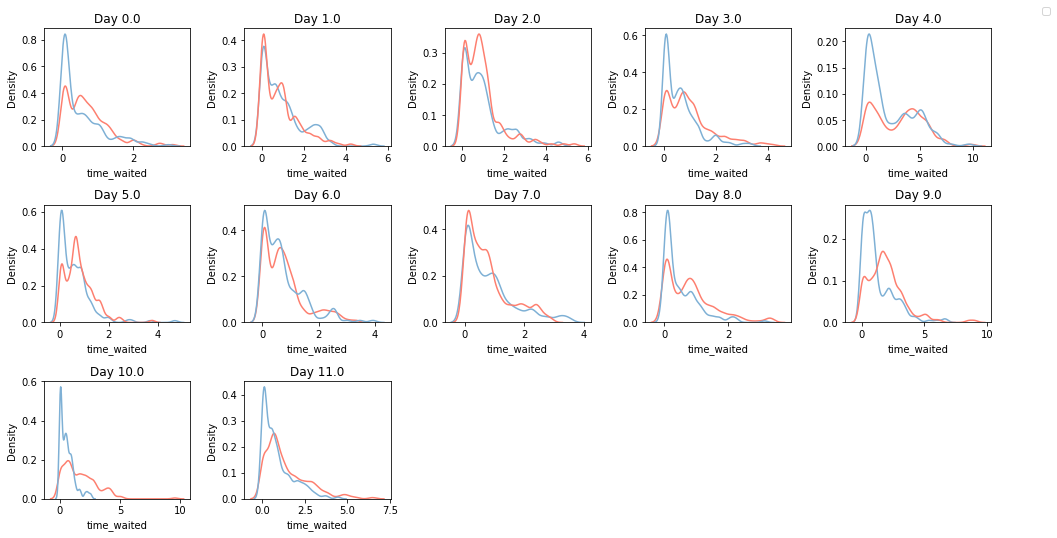

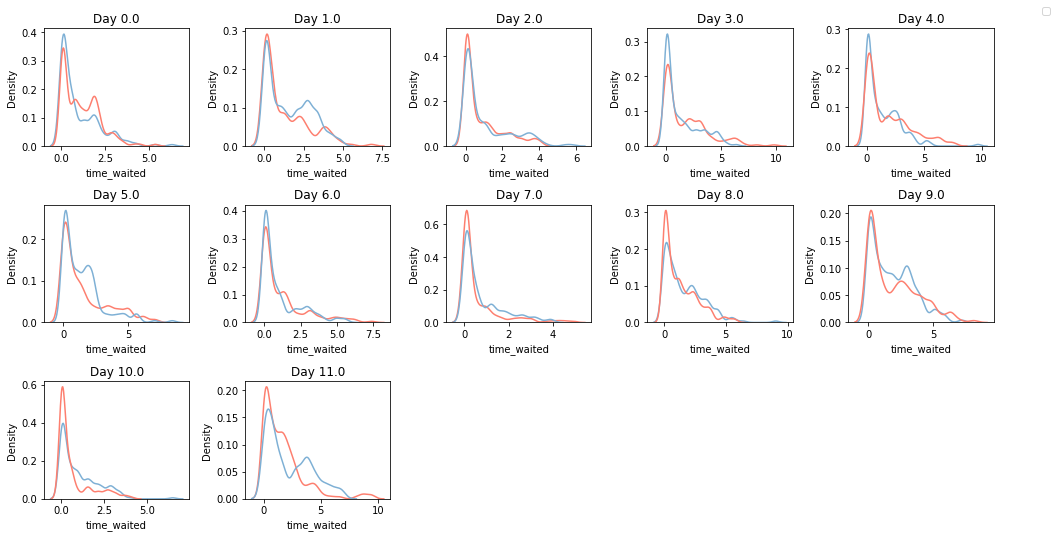

In [49]:
for mouse in mouse_list:
    session_mouse = training_session_log.loc[training_session_log.mouse == mouse]
    days_trained = len(session_mouse)

    # Calculate the number of rows and columns for the subplot grid
    num_rows = (days_trained - 1) // 5 + 1
    num_cols = min(days_trained, 5)

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(14, 2.5 * num_rows))

    for i, (dir_name, day) in enumerate(zip(session_mouse.dir, session_mouse.days)):
        all_trials = utils.load_all_trials_analyzed(data_folder, dir_name)
        row_idx = i // num_cols
        col_idx = i % num_cols
        ax = axs[row_idx, col_idx]

        sns.kdeplot(data=all_trials, 
                    x="time_waited", 
                    hue="blk_type",
                    bw_adjust=0.5, 
                    palette=custom_palette,
                    ax=axs.flat[i])
    
        ax.set_title(f'Day {day}')

    handles, labels = axs[0, 0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.05, 1))
    
    # Remove any unused subplots
    if i + 1 < num_rows * num_cols:
        for j in range(i + 1, num_rows * num_cols):
            axs.flat[j].axis('off')
    
    for i in range(days_trained):
        ax = axs.flat[i]
        ax.get_legend().remove()

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Save the figure with proper spacing around the subplots
    plt.savefig(f'{figure_folder}/tw_kde_{mouse}.png', bbox_inches='tight', dpi=300)

In [58]:
all_trials = utils.load_all_trials_analyzed(data_folder, training_session_log.dir[0])

In [60]:
session = utils.load_processed_session(data_folder, training_session_log.dir[0], training_session_log.filename[0])

In [62]:
all_trials

session_trial_num  block_trial_num  block_num    start_time  \
0                  0.0              0.0        0.0  1.685640e+09   
1                  1.0              1.0        0.0  1.685640e+09   
2                  2.0              2.0        0.0  1.685640e+09   
3                  3.0              3.0        0.0  1.685640e+09   
4                  4.0              4.0        0.0  1.685640e+09   
..                 ...              ...        ...           ...   
285              285.0             96.0        1.0  1.685642e+09   
286              286.0             97.0        1.0  1.685642e+09   
287              287.0             98.0        1.0  1.685642e+09   
288              288.0             99.0        1.0  1.685642e+09   
289              289.0            100.0        1.0  1.685642e+09   

         end_time  bg_drawn blk_type  bg_length  miss_trial  good_trial  \
0    1.685640e+09       3.0        l   3.007040       False        True   
1    1.685640e+09       2.9        l   2.906619       False       False   
2    1.685640e+09       3.3        l   3.306653       False       False   
3    1.685640e+09       2.7        l   2.706680       False        True   
4    1.685640e+09       2.6        l   2.606643       False        True   
..            ...       ...      ...        ...         ...         ...   
285  1.685642e+09       1.1        s   1.107053        True       False   
286  1.685642e+09       1.0        s   1.006634        True       False   
287  1.685642e+09       1.1        s   1.106859        True       False   
288  1.685642e+09       1.0        s   1.006882        True       False   
289  1.685642e+09       0.9        s   0.906631        True       False   

     time_waited    reward  num_consumption_lick  
0       0.652147  1.222059                  11.0  
1       0.157358  0.309892                   8.0  
2       0.147512  0.290784                   9.0  
3       1.526524  2.620889                  13.0  
4       0.573017  1.082315                   9.0  
..           ...       ...                   ...  
285          NaN       NaN                   NaN  
286          NaN       NaN                   NaN  
287          NaN       NaN                   NaN  
288          NaN       NaN                   NaN  
289          NaN       NaN                   NaN  

[290 rows x 13 columns]

# Some stats

In [50]:
import scipy.stats as s_stats

### Check if boys and girls are significantly different

In [51]:
boys =  ['RZ015', 'RZ016', 'RZ017']
girls = ['RZ012', 'RZ013', 'RZ014']

boy = wait_df['tw_mean'][wait_df['mouse'].isin(boys)]
girl = wait_df['tw_mean'][wait_df['mouse'].isin(girls)]

b_vs_g = s_stats.ttest_ind(boy, girl)

b_vs_g

Ttest_indResult(statistic=-0.2673148185634044, pvalue=0.7901750337893095)

In [52]:
for dir_name in training_session_log.dir:
    all_trials = utils.load_all_trials_analyzed(data_folder, dir_name)
    all_trials = all_trials[all_trials['time_waited'].notna()]
    long = all_trials['time_waited'][all_trials['blk_type'] == 'l']
    short = all_trials['time_waited'][all_trials['blk_type'] == 's']
    l_v_s = s_stats.ttest_ind(long, short)
    wait_df.loc[wait_df.dir == dir_name, 
                            ['tw_diff_p_val']] = l_v_s[1]
    
    good_trials = utils.select_good_trials(all_trials)
    long = good_trials['time_waited'][good_trials['blk_type'] == 'l']
    short = good_trials['time_waited'][good_trials['blk_type'] == 's']
    l_v_s = s_stats.ttest_ind(long, short)
    wait_df.loc[wait_df.dir == dir_name, 
                            ['tw_diff_g_p_val']] = l_v_s[1]

In [53]:
len(wait_df)

60

In [54]:
len(wait_df[wait_df.tw_diff > 0])

30

In [55]:
len(wait_df[wait_df['tw_diff_p_val'] < 0.05])

40

In [56]:
wait_df.loc[(wait_df.tw_diff > 0) & (wait_df.tw_diff_p_val < 0.05)]

mouse  days                        dir   tw_mean  tw_median  tw_stdev  \
2   RZ015   0.0  2023-06-01_14-05-18_RZ015  1.478797   0.993653  1.665454   
5   RZ012   1.0  2023-06-02_14-27-36_RZ012  0.987014   0.706079  0.971306   
7   RZ015   1.0  2023-06-02_15-07-06_RZ015  1.378223   0.902437  1.703682   
11  RZ013   2.0  2023-06-05_10-22-27_RZ013  1.095141   0.816704  1.078728   
15  RZ012   3.0  2023-06-06_10-19-13_RZ012  1.949505   1.392020  1.891043   
25  RZ012   5.0  2023-06-08_10-36-56_RZ012  1.900288   1.590520  1.619177   
31  RZ012   6.0  2023-06-09_10-55-27_RZ012  1.172568   0.849547  1.114707   
33  RZ015   6.0  2023-06-09_11-34-40_RZ015  1.454407   1.104518  1.453653   
35  RZ013   7.0  2023-06-12_09-36-17_RZ013  0.939841   0.682674  0.953346   
39  RZ015   7.0  2023-06-12_11-00-33_RZ015  0.966016   0.718312  1.118660   
40  RZ013   8.0  2023-06-13_10-45-53_RZ013  2.776676   2.429136  2.300199   
41  RZ012   8.0  2023-06-13_11-23-31_RZ012  1.084654   0.732764  1.129442   
44  RZ017   8.0  2023-06-13_12-37-28_RZ017  1.473821   1.037382  1.467813   
46  RZ012   9.0  2023-06-14_10-49-41_RZ012  1.029951   0.649742  1.085433   
48  RZ015   9.0  2023-06-14_11-33-33_RZ015  1.366980   1.051543  1.369080   
51  RZ012  10.0  2023-06-15_10-34-22_RZ012  1.500686   0.979376  1.562140   
54  RZ017  10.0  2023-06-15_13-21-05_RZ017  0.892276   0.423504  1.071692   
55  RZ012  11.0  2023-06-16_10-34-19_RZ012  0.910287   0.670708  0.865927   
56  RZ013  11.0  2023-06-16_10-38-18_RZ013  1.937848   1.286447  2.074287   
59  RZ017  11.0  2023-06-16_11-42-38_RZ017  1.939392   1.342000  1.922381   

    tw_l_mean  tw_l_median  tw_l_stdev  tw_s_mean  ...  tw_l_mean_g  \
2    2.285220     1.619224    2.111967   0.895007  ...     3.153273   
5    1.106427     0.803016    1.108263   0.850955  ...     1.688709   
7    2.181629     1.518316    2.255149   0.829790  ...     2.757001   
11   1.305439     1.056509    1.178189   0.913774  ...     1.814120   
15   2.766927     2.379488    2.330021   1.388433  ...     3.176530   
25   2.664616     2.319420    1.956422   1.557499  ...     3.046396   
31   1.286692     0.888146    1.178268   1.043466  ...     1.909425   
33   2.005271     1.731093    1.758071   0.953928  ...     2.662351   
35   1.103682     0.846851    1.025299   0.771320  ...     1.573775   
39   1.572929     1.002230    1.837024   0.784306  ...     2.241683   
40   3.280670     3.104255    1.997334   2.513723  ...     3.452192   
41   1.269921     0.823148    1.341998   0.911878  ...     1.908357   
44   1.644658     1.186379    1.562052   1.300213  ...     2.292069   
46   1.356428     1.002247    1.227523   0.716170  ...     1.895423   
48   1.908854     1.326806    1.945596   1.190158  ...     2.632731   
51   2.064331     1.633094    1.861384   0.957292  ...     2.648357   
54   1.053238     0.674078    1.109221   0.719218  ...     1.778426   
55   1.043391     0.790737    0.943305   0.774070  ...     1.509159   
56   2.363449     1.598333    2.143072   1.558119  ...     2.740050   
59   2.218873     1.592245    1.955334   1.669660  ...     2.923379   

    tw_l_median_g  tw_l_stdev_g  tw_s_mean_g  tw_s_median_g  tw_s_stdev_g  \
2        2.876850      1.906024     1.503501       1.409778      0.708163   
5        1.347997      1.057293     1.347815       1.252587      0.650078   
7        2.193622      2.235605     1.461142       1.253101      0.700513   
11       1.621791      1.085994     1.705093       1.522119      0.784820   
15       2.613728      2.252443     1.835192       1.485046      1.177455   
25       2.622797      1.826533     2.006437       1.731127      1.195627   
31       1.788400      1.034584     1.591745       1.378994      0.948939   
33       2.641649      1.588917     1.440424       1.362039      0.706765   
35       1.334044      0.939060     1.454536       1.366224      0.717098   
39       1.761578      1.886947     1.253918       1.153977      0.582769   
40       3.211019      1.907639     3.601683   